In [ ]:
# Regression Example with Tensor Flow

In [32]:
import numpy as np,tensorflow as tf,matplotlib.pyplot as plt, pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [33]:
rng=np.random.RandomState(42)
n=600
X=pd.DataFrame(

    {
        "Size_sqft":rng.normal(1200,300,n).clip(400,3000),
        "Rooms":rng.randint(1,6,n),
        "Age_yrs":rng.randint(0,30,n)
    })
noise=rng.normal(0,2000,n)
y= 80*X["Size_sqft"] +1500*X["Rooms"]-1200*X["Age_yrs"]+5000+noise
#Splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scalar=StandardScaler()
#transform using
X_train_tr=scalar.fit_transform(X_train)
X_test_tr=scalar.transform(X_test)
print(X_train)
print(X_train_tr)

       Size_sqft  Rooms  Age_yrs
145  1434.546862      2       22
9    1362.768013      2       28
375   969.795731      1        0
523  1371.179601      5       24
188   945.961885      3       25
..           ...    ...      ...
71   1661.410970      3       21
106  1765.855770      1       10
270  1632.381987      1        7
435  1222.228434      1        5
102  1097.185645      5       22

[480 rows x 3 columns]
[[ 0.84064839 -0.67166527  0.91267086]
 [ 0.59449956 -0.67166527  1.62596586]
 [-0.75310727 -1.37253337 -1.70274414]
 ...
 [ 1.51907783 -1.37253337 -0.87056664]
 [ 0.11255184 -1.37253337 -1.10833164]
 [-0.31625326  1.43093905  0.91267086]]


In [41]:
#model creation
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_tr.shape[1],)),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(1)
])

In [42]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.mse,
              metrics=["mae"]
              )

In [43]:
history=model.fit(X_train_tr,y_train,epochs=100,validation_data=(X_test_tr,y_test),batch_size=32)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 7897614848.0000 - mae: 85546.3438 - val_loss: 8752270336.0000 - val_mae: 90463.9141
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7897511424.0000 - mae: 85545.7266 - val_loss: 8752139264.0000 - val_mae: 90463.2266
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7897380864.0000 - mae: 85544.9609 - val_loss: 8751958016.0000 - val_mae: 90462.2500
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7897195008.0000 - mae: 85543.8672 - val_loss: 8751691776.0000 - val_mae: 90460.7969
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7896923648.0000 - mae: 85542.2812 - val_loss: 8751310848.0000 - val_mae: 90458.7422
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7896538112.0000 - mae: 85540.0234 - val_loss: 8750776320.0000 - val_mae: 90455.8672
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7896001024.0000 - mae: 85536.8906 - val_loss: 8750043136.0000 - val_mae: 90451.

In [44]:
loss,mae=model.evaluate(X_test,y_test,verbose=0)
print(f"MAE:{mae}")

MAE:20321396.0


In [48]:
y_pred=model.predict(X_test_tr)
# print(y_pred.flatten())
print(y_test.values)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[ 55062.79068262  88425.99090409  87366.14602504  81939.80624264
  66772.78790651 126177.02089689  78802.77853444  71617.12159909
  70095.5254245  101635.02115683  89623.29386498 120608.35806268
  70639.35541564 105380.07387426  77527.26031344 121454.03404731
  75300.78582452 121066.13686475  84706.25004956 126307.80379083
 105807.71038328  56811.68341924  72014.30607706  90257.25485498
  85975.04321158  73856.68731658  75156.39241474 109728.62978352
  71139.33605726  70749.0249942   73291.33454148  69376.50156381
 139457.31525072  86605.2758848  111209.65816845 109181.47239824
  71878.58721007  99401.35365217 104166.91867891  93555.66504606
  89696.31576593  97256.14325122  64046.50647941  92329.40617321
  57527.46547546  80825.35454159 111953.70098211  82449.8481597
  66558.22412267  76609.91680695  76550.44482151 126750.40727491
  83240.04485203  88828.45962243  58514.89965001  91389.66617063
 196281.22728829 110488.09489217  91539.16343354 1030

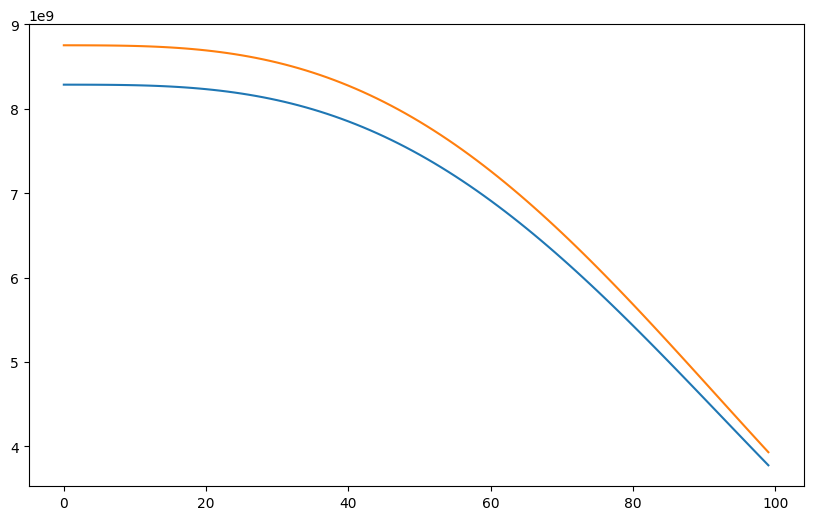

In [49]:
plt.figure(figsize=(10,6))
plt.plot(history.history["loss"],label="Training Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")


In [50]:
print(y_test.shape)
print(y_pred.shape)

(120,)
(120, 1)


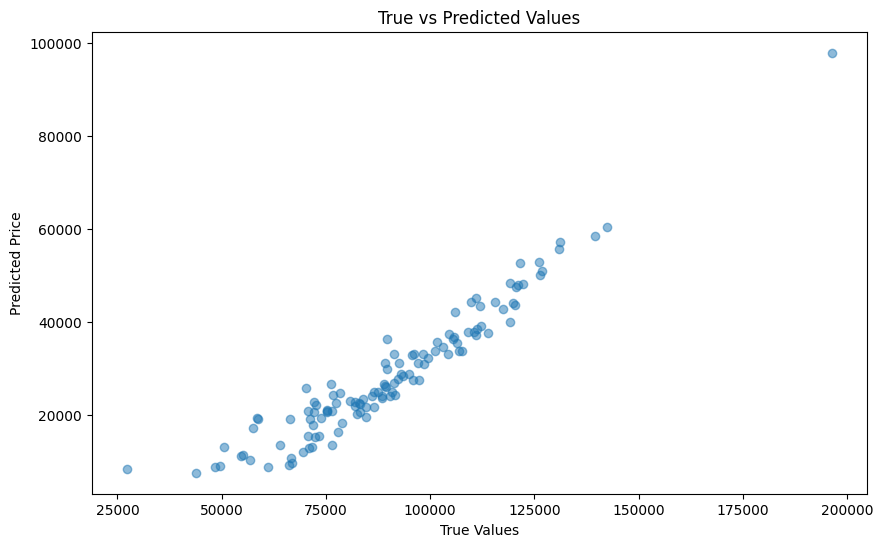

In [51]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predicted Price")
plt.title("True vs Predicted Values")
plt.show()